In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start='2010-01-01'
end='2021-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.551132
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.640778
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.465637
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838242


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


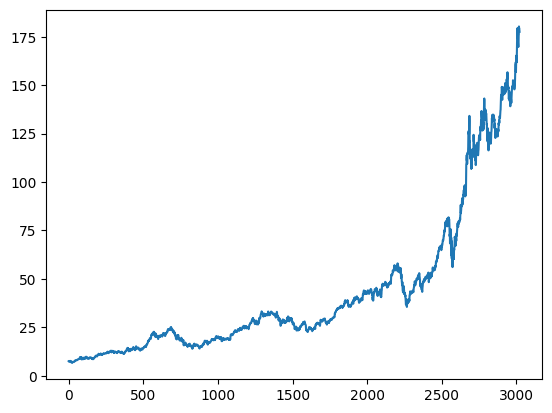

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

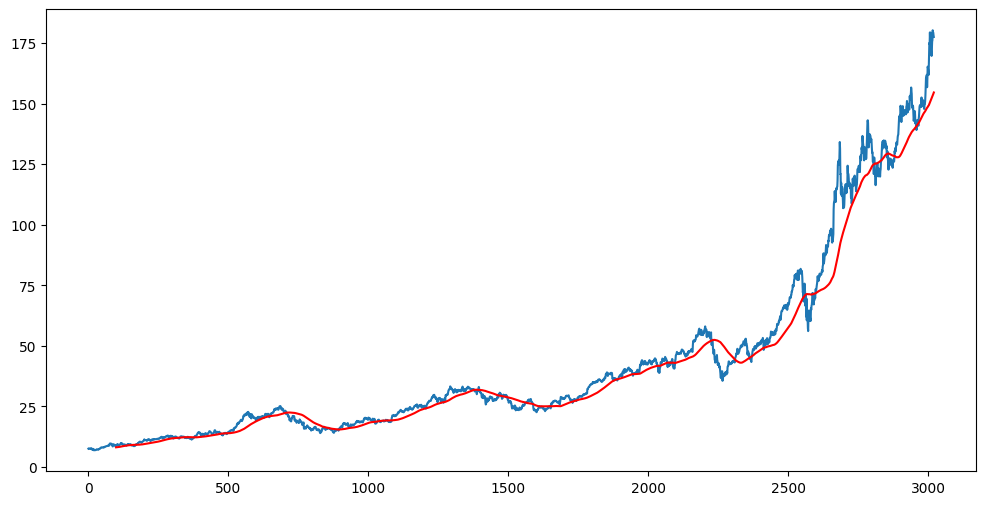

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

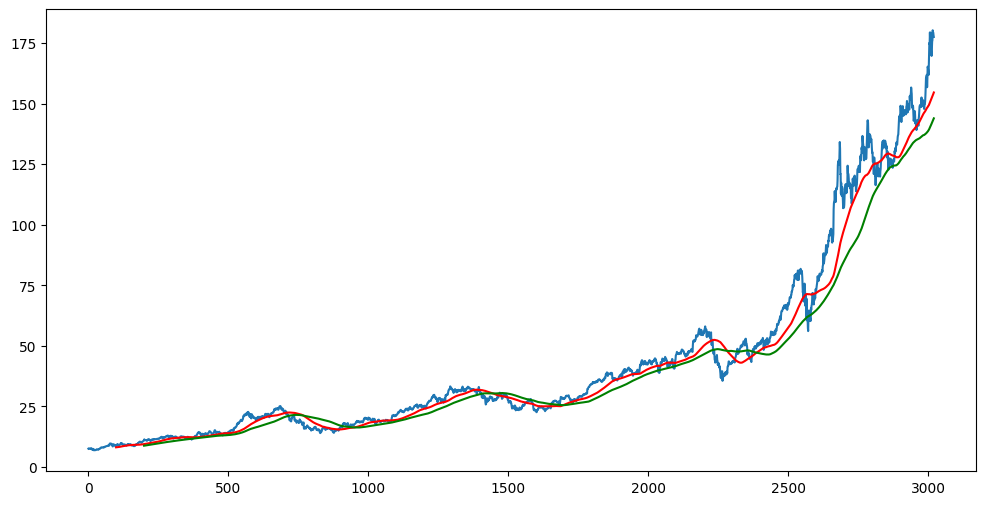

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [11]:
df.shape


(3022, 5)

In [12]:
# splitting Data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
data_training.shape


(2115, 1)

In [13]:
data_testing.shape

(907, 1)

In [14]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [15]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))


In [18]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [19]:
x_train=[]
y_train=[]

In [20]:
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


In [21]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [22]:
# ML Model

In [23]:
from keras.layers import Dense,Dropout,LSTM

In [24]:
from keras.models import Sequential

In [25]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
20/63 [========>.....................] - ETA: 16s - loss: 0.0869

KeyboardInterrupt: 

In [ ]:
# model.save('keras_model.h5')

In [28]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [29]:
past_100_days=data_training.tail(100)

In [31]:
final_df=past_100_days.append(data_testing,ignore_index=True)


C:\Users\Sahil\AppData\Local\Temp\ipykernel_17792\2155672971.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [32]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [33]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [36]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [37]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [38]:
x_test.shape

(907, 100, 1)

In [39]:
# Make pridiction

In [40]:
y_predicted=model.predict(x_test)

29/29 [==============================] - 5s 130ms/step


In [42]:
y_predicted.shape

(907, 1)

In [43]:
y_predicted

array([[0.26063707],
       [0.26113033],
       [0.26161367],
       [0.26208234],
       [0.26253456],
       [0.26297095],
       [0.2633942 ],
       [0.2638075 ],
       [0.2642134 ],
       [0.2646123 ],
       [0.2650029 ],
       [0.265384  ],
       [0.2657533 ],
       [0.2661083 ],
       [0.26644537],
       [0.26676103],
       [0.2670503 ],
       [0.26730907],
       [0.26753408],
       [0.26772282],
       [0.26787224],
       [0.2679816 ],
       [0.2680519 ],
       [0.2680861 ],
       [0.26808837],
       [0.26806435],
       [0.26801816],
       [0.2679539 ],
       [0.26787734],
       [0.26779607],
       [0.2677175 ],
       [0.26764598],
       [0.26758623],
       [0.2675421 ],
       [0.26751623],
       [0.26751015],
       [0.26752368],
       [0.26755646],
       [0.26760754],
       [0.26767534],
       [0.26775894],
       [0.26785865],
       [0.26797453],
       [0.26810357],
       [0.26824126],
       [0.26838252],
       [0.26853076],
       [0.268

In [44]:
scaler.scale_

array([0.00690691])

In [45]:
scale_factor=1/0.00690691

In [50]:
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor
print(y_predicted)
print(y_test)

[[1.14525192e+08]
 [1.14741936e+08]
 [1.14954320e+08]
 [1.15160256e+08]
 [1.15358960e+08]
 [1.15550712e+08]
 [1.15736688e+08]
 [1.15918304e+08]
 [1.16096664e+08]
 [1.16271928e+08]
 [1.16443552e+08]
 [1.16611016e+08]
 [1.16773296e+08]
 [1.16929280e+08]
 [1.17077376e+08]
 [1.17216088e+08]
 [1.17343208e+08]
 [1.17456896e+08]
 [1.17555776e+08]
 [1.17638704e+08]
 [1.17704368e+08]
 [1.17752416e+08]
 [1.17783296e+08]
 [1.17798336e+08]
 [1.17799336e+08]
 [1.17788776e+08]
 [1.17768480e+08]
 [1.17740240e+08]
 [1.17706600e+08]
 [1.17670896e+08]
 [1.17636368e+08]
 [1.17604952e+08]
 [1.17578696e+08]
 [1.17559296e+08]
 [1.17547928e+08]
 [1.17545256e+08]
 [1.17551192e+08]
 [1.17565616e+08]
 [1.17588048e+08]
 [1.17617848e+08]
 [1.17654568e+08]
 [1.17698392e+08]
 [1.17749312e+08]
 [1.17806008e+08]
 [1.17866504e+08]
 [1.17928576e+08]
 [1.17993720e+08]
 [1.18066312e+08]
 [1.18151352e+08]
 [1.18253392e+08]
 [1.18374880e+08]
 [1.18516768e+08]
 [1.18678968e+08]
 [1.18860040e+08]
 [1.19058080e+08]
 [1.192710

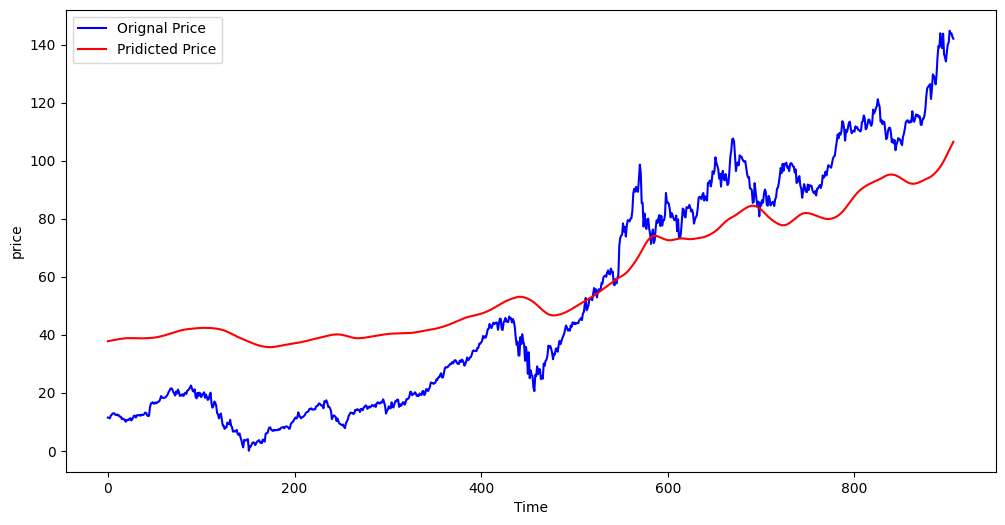

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Orignal Price')
plt.plot(y_predicted,'r',label='Pridicted Price')
plt.xlabel("Time")
plt.ylabel('price')
plt.legend()
plt.show()